In [1]:
from IPython import display
!pip install ultralytics

display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
try:
    rm -r /content/datasets
except:
    pass


In [4]:
directory = f'{HOME}/datasets'
if not os.path.exists(directory):
    os.makedirs(directory)
    print('Directory created successfully')
else:
    print('Directory already exists')

Directory created successfully


In [5]:
cd {HOME}/datasets

/kaggle/working/datasets


In [6]:
import cv2
import shutil

if os.path.exists('FootballPitch'):
    shutil.rmtree('FootballPitch')
    print(f"Removed existing directory")

!git clone https://github.com/iramamy/FootballPitch.git
print('Repository cloned')


Cloning into 'FootballPitch'...
remote: Enumerating objects: 605, done.
remote: Counting objects: 100% (605/605), done.
remote: Compressing objects: 100% (602/602), done.
remote: Total 605 (delta 3), reused 605 (delta 3), pack-reused 0
Receiving objects: 100% (605/605), 20.92 MiB | 36.87 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Repository cloned


In [8]:
from ultralytics import YOLO
from IPython.display import display, Image

In [9]:
model = YOLO("yolov8x-seg.pt")

100%|██████████| 137M/137M [00:00<00:00, 282MB/s]  


In [10]:
model.train(
    data=f"{HOME}/datasets/FootballPitch/data.yaml", 
    epochs=20,
    imgsz=640)

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/kaggle/working/datasets/FootballPitch/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]
2024-07-17 18:03:26,844	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-17 18:03:28,132	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/FootballPitch/Train/labels... 315 images, 0 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<00:00, 943.07it/s]

train: New cache created: /kaggle/working/datasets/FootballPitch/Train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/FootballPitch/Valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1086.19it/s]

val: New cache created: /kaggle/working/datasets/FootballPitch/Valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      15.4G      1.573       5.02      2.928      1.657        112        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         30        142      0.743      0.602      0.491      0.327      0.743      0.602       0.44      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      15.4G      0.957      2.002      1.251      1.214         73        640: 100%|██████████| 20/20 [00:29<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         30        142      0.124       0.31       0.08     0.0349      0.148      0.332     0.0902     0.0315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      15.4G     0.9785      1.704      1.083      1.222        102        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         30        142      0.245      0.737      0.226       0.11      0.248       0.61      0.208     0.0814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.3G     0.9554      1.686     0.9857      1.215         77        640: 100%|██████████| 20/20 [00:31<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         30        142     0.0079      0.368    0.00602    0.00249    0.00584      0.298    0.00432    0.00185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      15.3G     0.9778      1.802     0.9508      1.203         93        640: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         30        142       0.21      0.278      0.204      0.109      0.201      0.267      0.175     0.0582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      15.5G      0.911      1.512     0.8868      1.167         77        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         30        142      0.661      0.775      0.861      0.596      0.653      0.766      0.849      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.2G     0.8465      1.358     0.7502      1.133         61        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         30        142      0.759      0.714      0.803      0.599      0.737      0.717      0.791      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      15.5G     0.7788      1.303     0.7275      1.111         98        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         30        142      0.733      0.876      0.887      0.638      0.733      0.876      0.872      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      15.5G     0.7459      1.219     0.6747      1.076         77        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         30        142      0.807      0.869      0.933      0.761      0.812      0.855      0.915      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      15.4G     0.7263      1.225     0.6512      1.068        113        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         30        142      0.791      0.885      0.898      0.722      0.792      0.883      0.881      0.738


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      15.4G     0.7706      0.999     0.6617       1.11         45        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         30        142      0.916      0.884      0.955      0.808      0.916      0.884      0.956      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      15.3G      0.708     0.8747     0.5875      1.082         47        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         30        142      0.979      0.902      0.959      0.816      0.979      0.902      0.948      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      15.3G     0.6583     0.8607     0.5442      1.057         52        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         30        142       0.96       0.92       0.95      0.808      0.975      0.903      0.934      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      15.3G     0.5989     0.8219     0.5029      1.015         49        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         30        142      0.957      0.939      0.961      0.854      0.947      0.929      0.948      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      15.3G     0.5842     0.7617     0.4863     0.9997         50        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         30        142      0.955       0.95      0.962      0.861      0.966      0.923      0.946       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      15.4G     0.5517     0.6966     0.4483     0.9686         49        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         30        142      0.986      0.951      0.972      0.875      0.971      0.938      0.956      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      15.3G     0.5257     0.6691     0.4299     0.9665         49        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         30        142      0.978      0.942      0.972      0.882      0.969      0.933      0.964      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      15.3G     0.4879     0.6024     0.4066     0.9466         46        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         30        142      0.959       0.96      0.972      0.888      0.963      0.936      0.959      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      15.3G     0.4791     0.6047     0.3957     0.9316         46        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         30        142      0.959      0.969      0.975      0.894       0.95       0.96      0.966      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      15.3G     0.4499     0.5344     0.3774     0.9285         51        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         30        142      0.961       0.97      0.975      0.895      0.946      0.951      0.967      0.848



20 epochs completed in 0.196 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 143.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 143.9MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,723,545 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


                   all         30        142      0.959      0.969      0.975      0.894       0.95       0.96      0.966      0.862
  cross_recipient_zone         30         36      0.979      0.972      0.977      0.945      0.951      0.944       0.95      0.885
  crossing_player_zone         30         76      0.919      0.934      0.952      0.744      0.919      0.934      0.954      0.713
                 pitch         30         30      0.979          1      0.995      0.993      0.979          1      0.995      0.987
Speed: 0.2ms preprocess, 34.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1f768c1cc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [11]:
!ls {HOME}/datasets/runs/segment/train/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


BoxF1_curve.png					  labels_correlogram.jpg
BoxPR_curve.png					  results.csv
BoxP_curve.png					  results.png
BoxR_curve.png					  train_batch0.jpg
MaskF1_curve.png				  train_batch1.jpg
MaskPR_curve.png				  train_batch2.jpg
MaskP_curve.png					  train_batch200.jpg
MaskR_curve.png					  train_batch201.jpg
args.yaml					  train_batch202.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1721239420.9ea8af3178c9.34.0  weights
labels.jpg


/kaggle/working


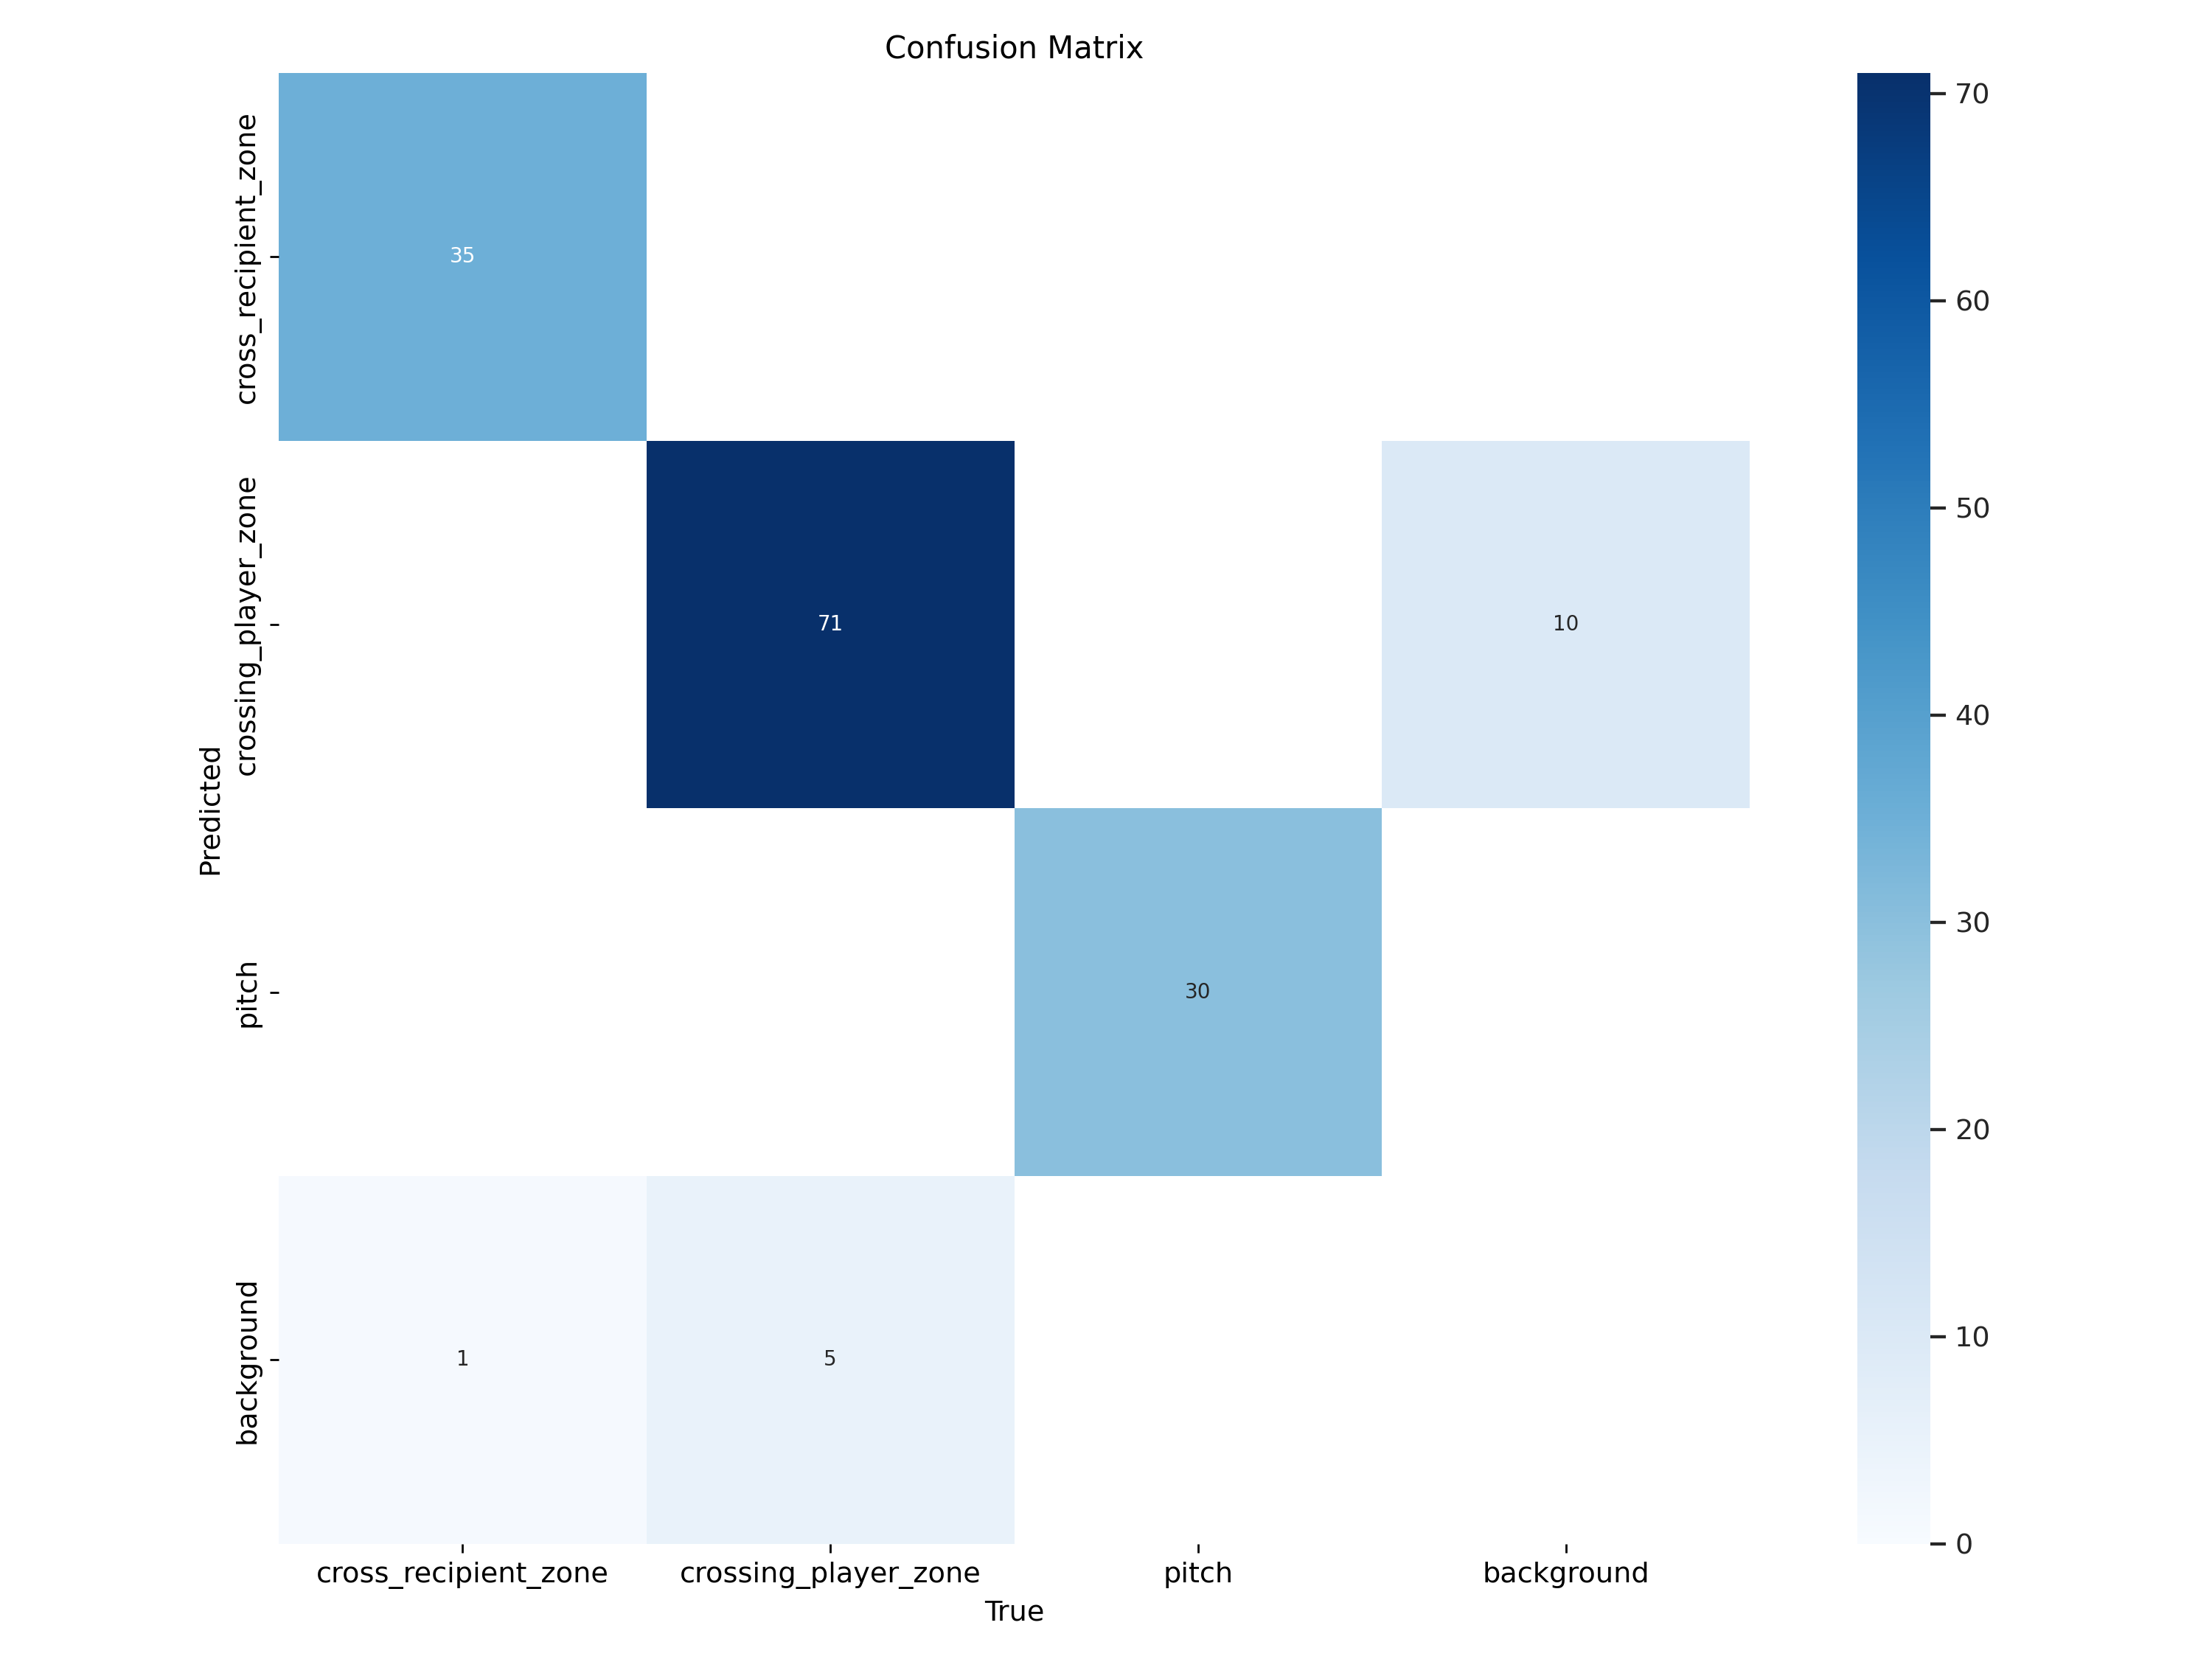

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/confusion_matrix.png', width=600)

/kaggle/working


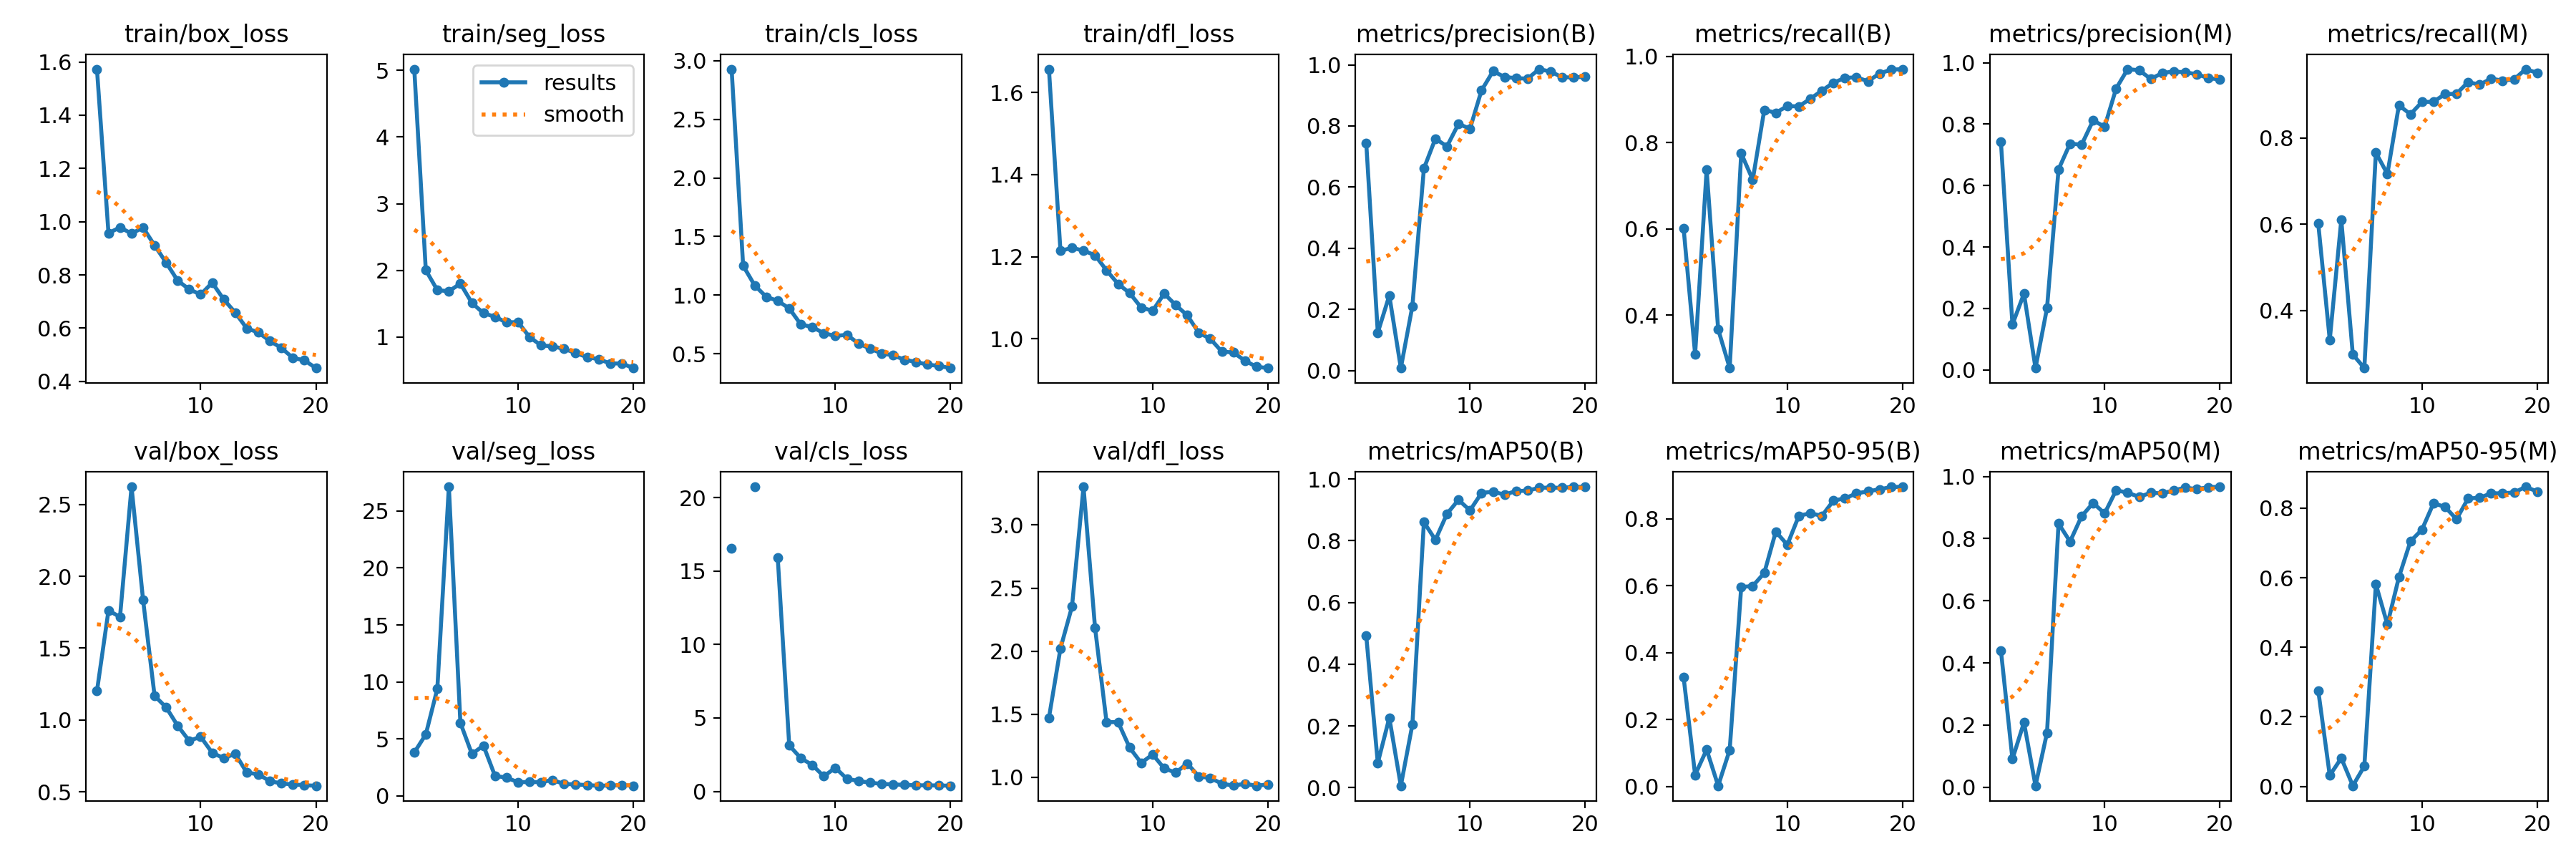

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/results.png', width=1600)

In [14]:
%cd {HOME}

val_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
val_model.val(data=f"{HOME}/datasets/FootballPitch/data.yaml")


/kaggle/working
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,723,545 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning /kaggle/working/datasets/FootballPitch/Valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]


                   all         30        142      0.959      0.969      0.975      0.895       0.95       0.96      0.966      0.854
  cross_recipient_zone         30         36      0.979      0.972      0.977      0.948      0.951      0.944       0.95      0.871
  crossing_player_zone         30         76       0.92      0.934      0.952      0.744       0.92      0.934      0.953      0.703
                 pitch         30         30      0.979          1      0.995      0.993      0.979          1      0.995      0.987
Speed: 0.3ms preprocess, 92.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/segment/val


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1f59e509d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [15]:
%%capture
%cd {HOME}

pred_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
pred_model.predict(
    source=f"{HOME}/datasets/FootballPitch/Test/images",
    show_conf=False,
    show_labels=False,
    show_boxes=False,
    save=True
)

WARNING ⚠️ 'boxes' is deprecated and will be removed in in the future. Please use 'show_boxes' instead.

image 1/15 /kaggle/working/datasets/FootballPitch/Test/images/08fd33_2_png.rf.7dc84747306219fa695cdd54ed2dbca3.jpg: 640x640 1 cross_recipient_zone, 2 crossing_player_zones, 1 pitch, 85.5ms
image 2/15 /kaggle/working/datasets/FootballPitch/Test/images/0bfacc_5_png.rf.bab1bad9985ad42f73863733392e4389.jpg: 640x640 1 cross_recipient_zone, 1 crossing_player_zone, 1 pitch, 85.8ms
image 3/15 /kaggle/working/datasets/FootballPitch/Test/images/121364_5_png.rf.e3e8a2c0771e5b1c47063c25eaa92607.jpg: 640x640 1 cross_recipient_zone, 2 crossing_player_zones, 1 pitch, 80.7ms
image 4/15 /kaggle/working/datasets/FootballPitch/Test/images/121364_7_png.rf.74275d18c8bca3e94af8878e6da85ae6.jpg: 640x640 1 cross_recipient_zone, 2 crossing_player_zones, 1 pitch, 82.1ms
image 5/15 /kaggle/working/datasets/FootballPitch/Test/images/2e57b9_8_png.rf.3c321c09167ded4788011284dcfd82cc.jpg: 640x640 2 cross_recipien

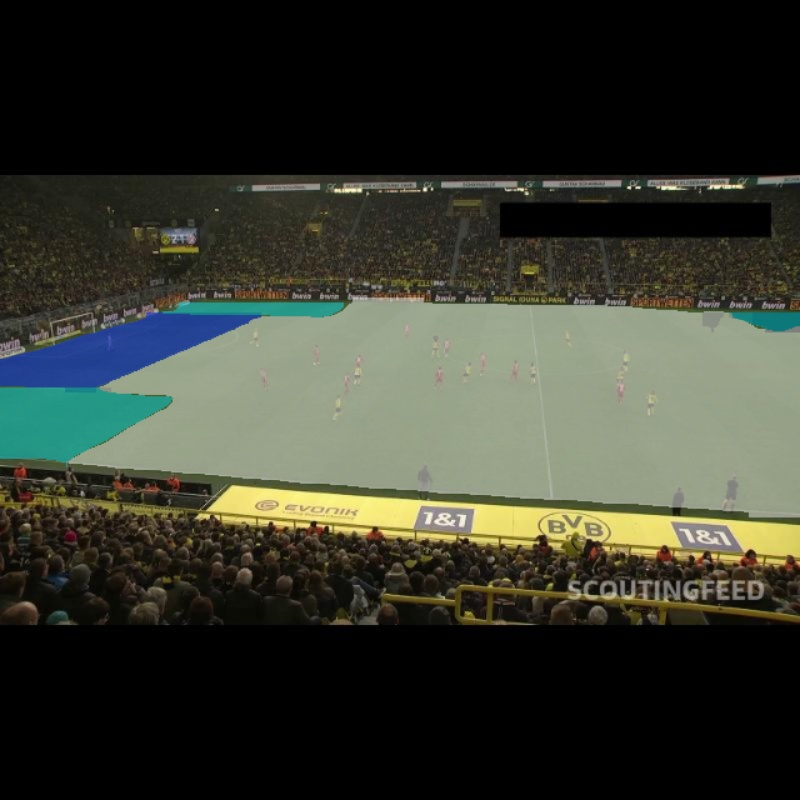

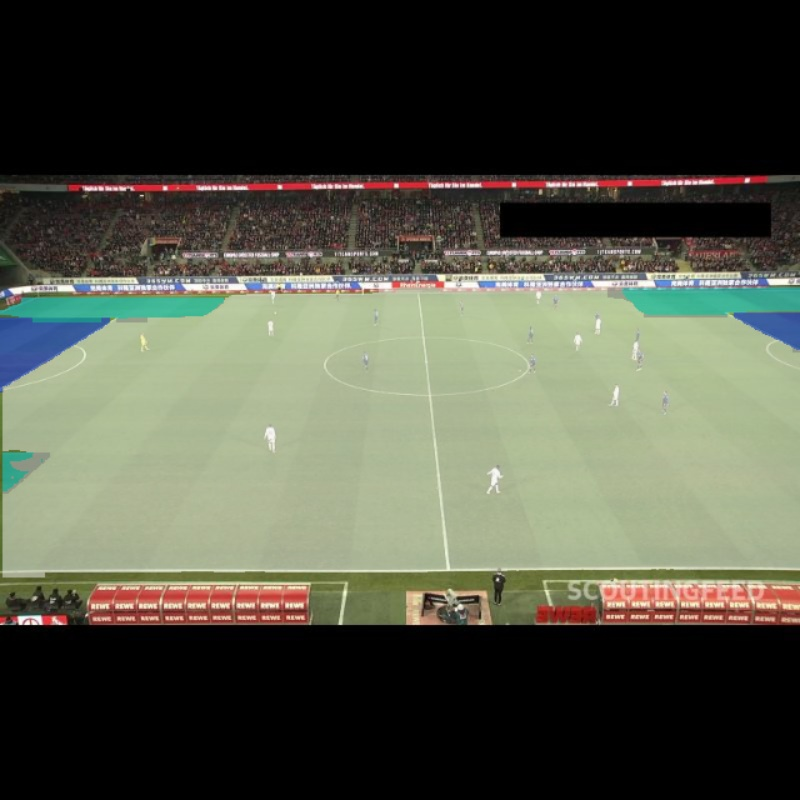

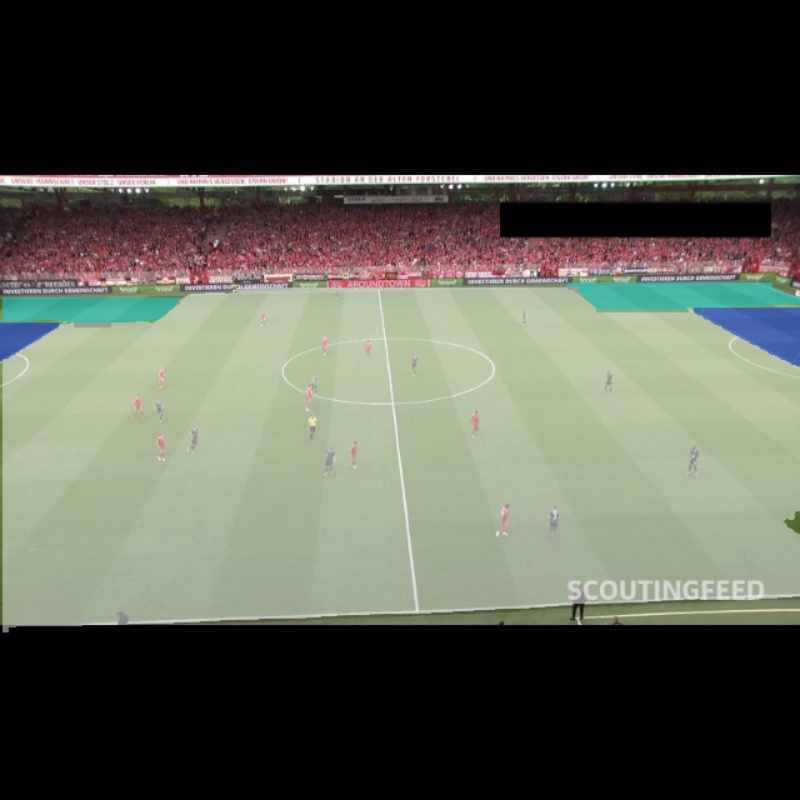

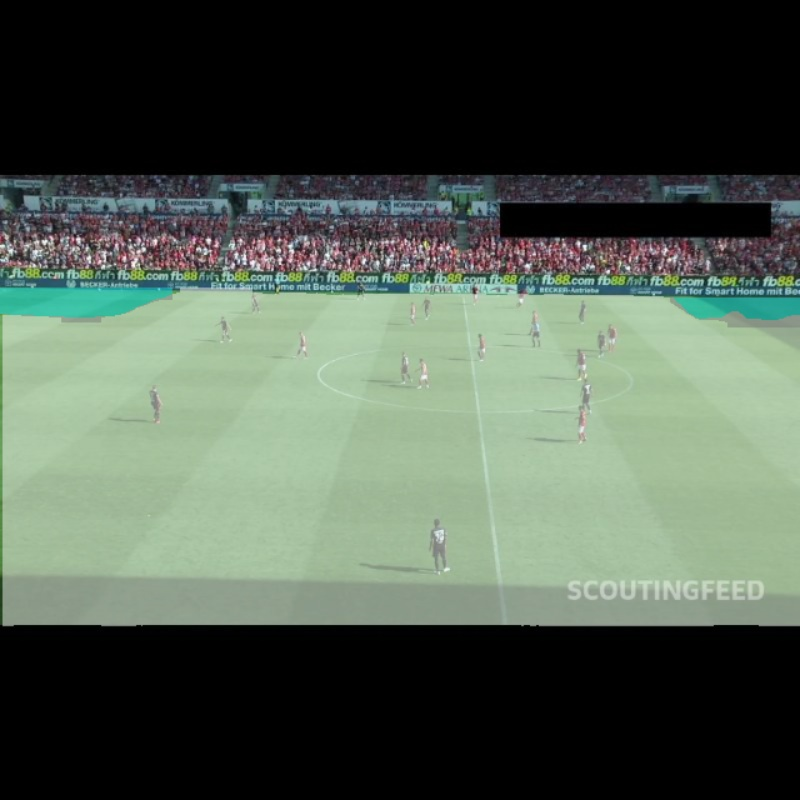

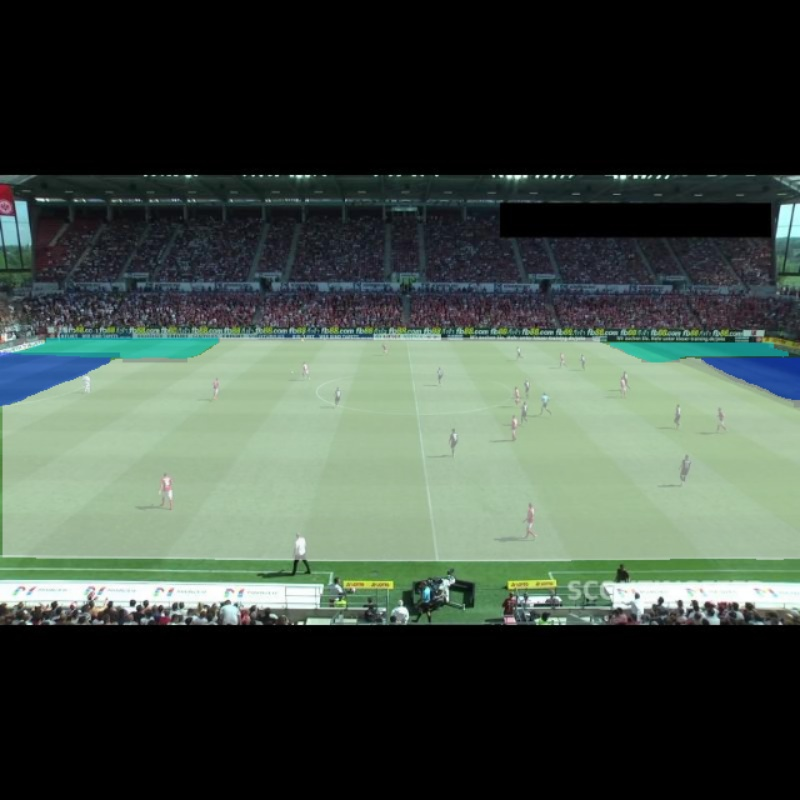

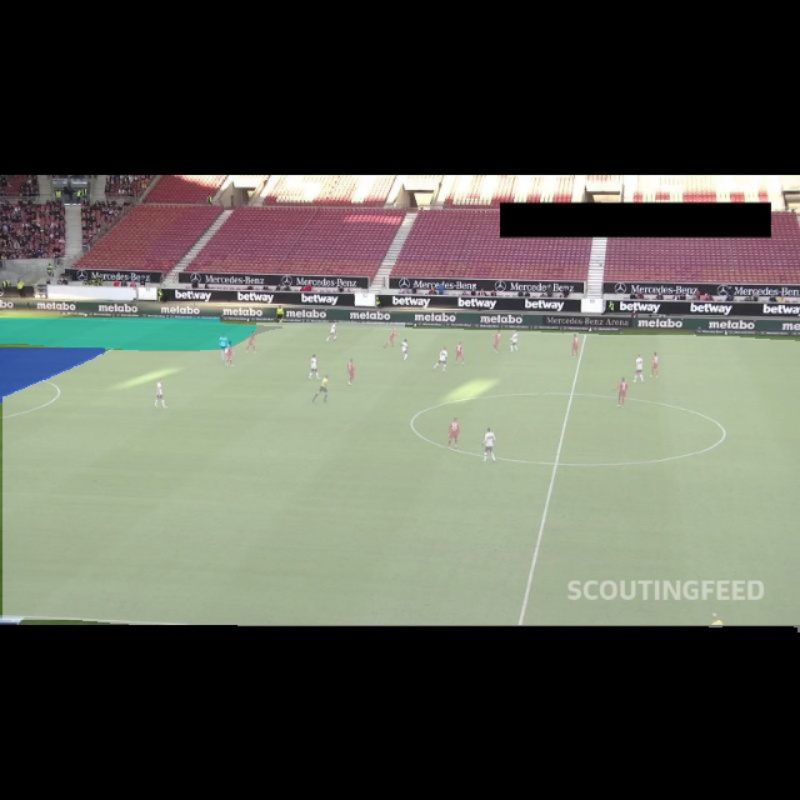

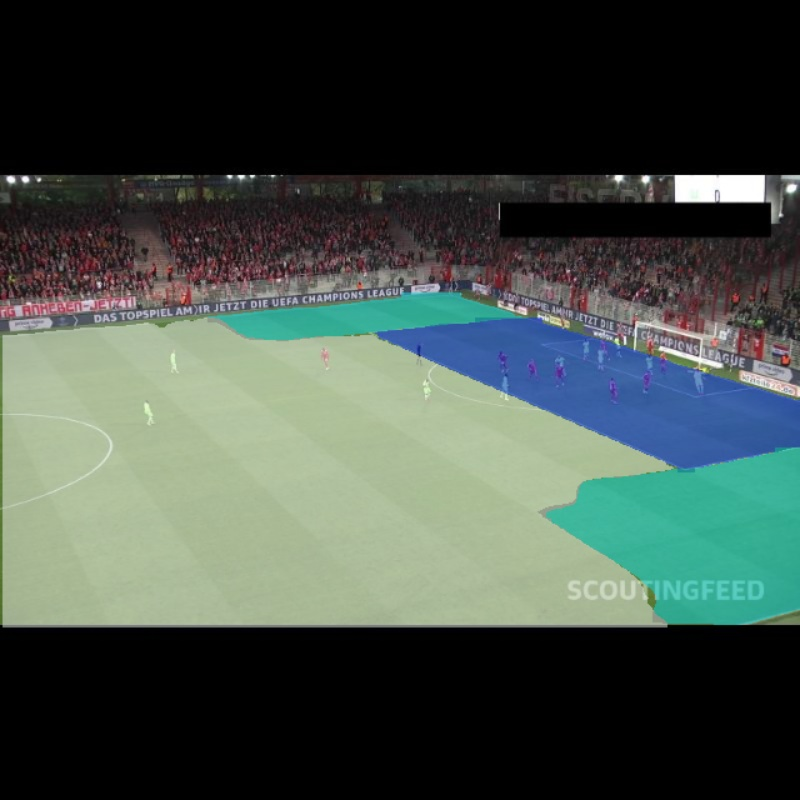

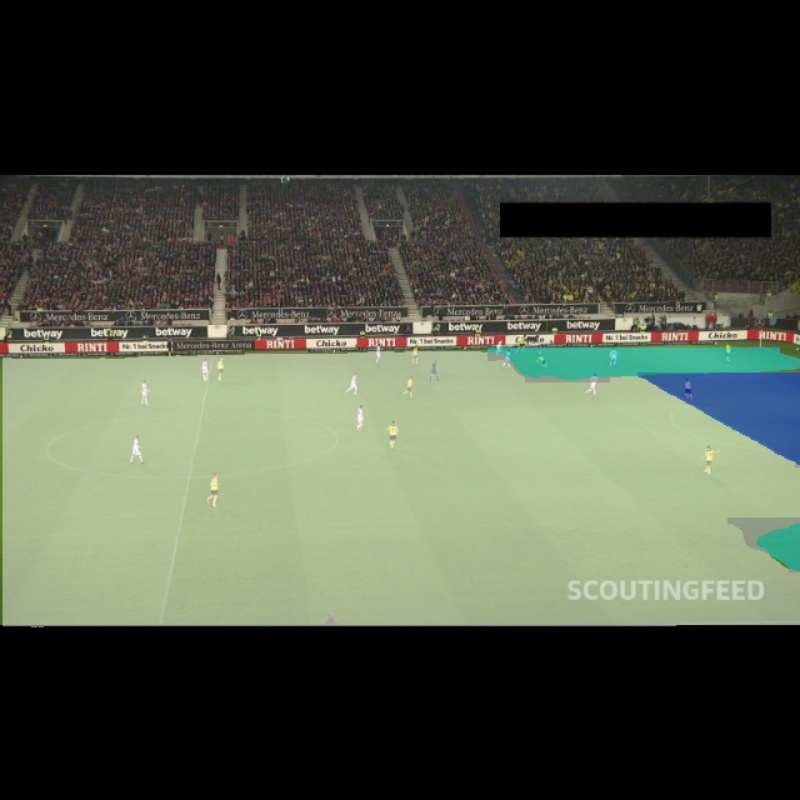

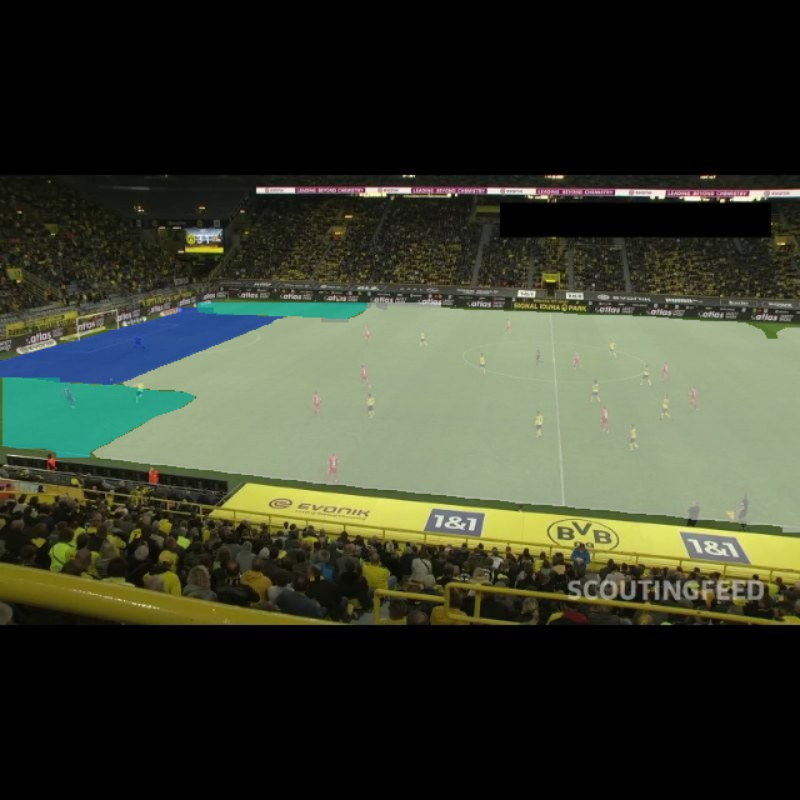

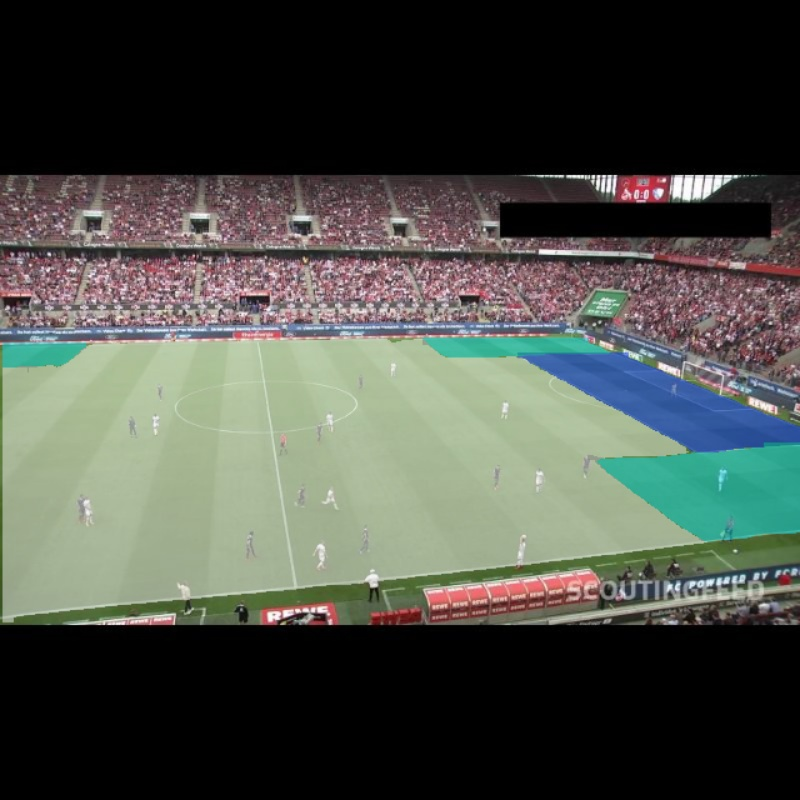

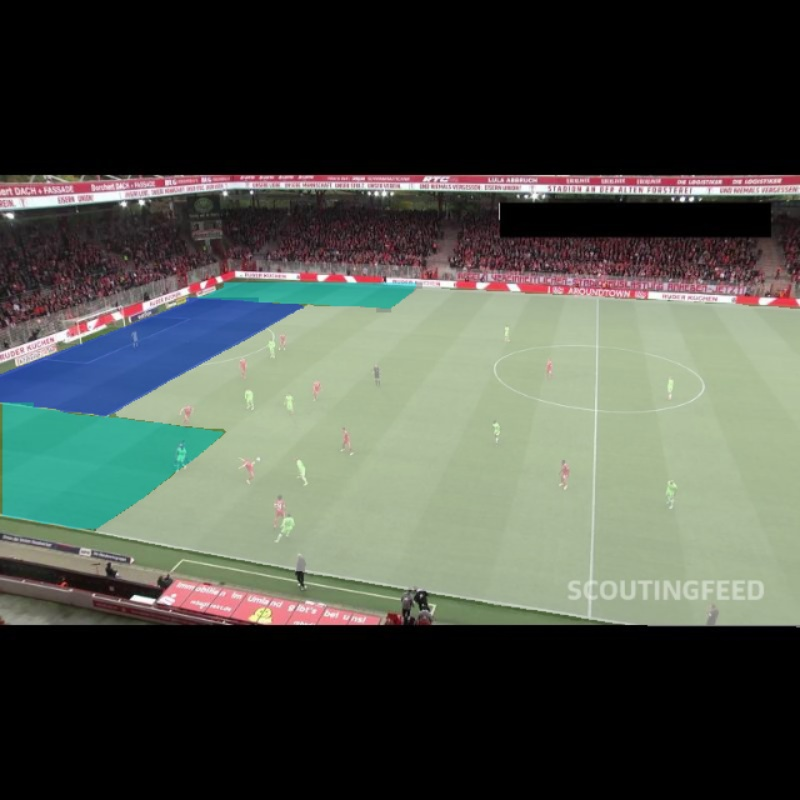

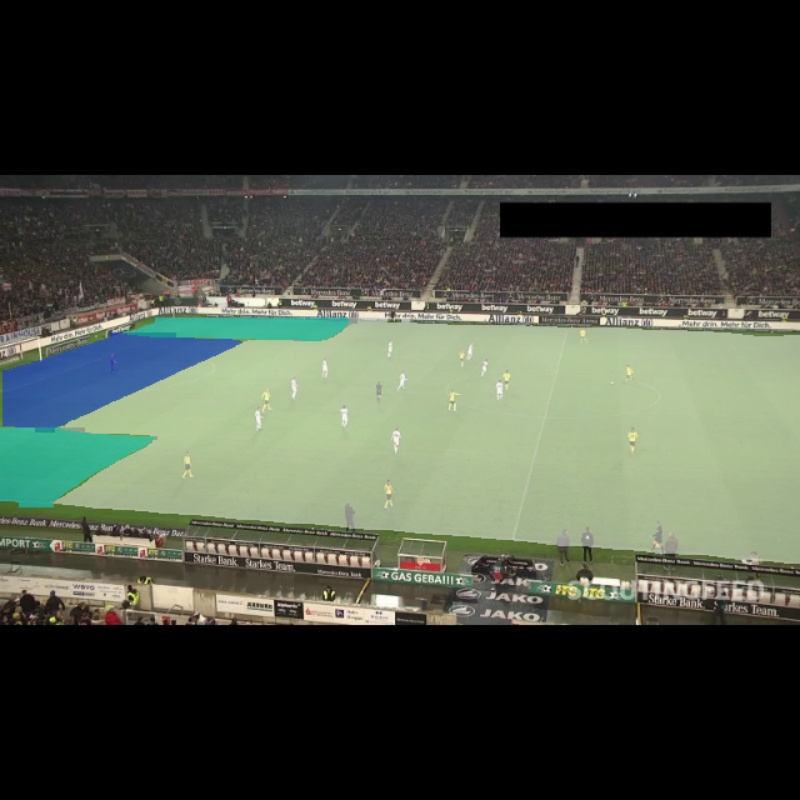

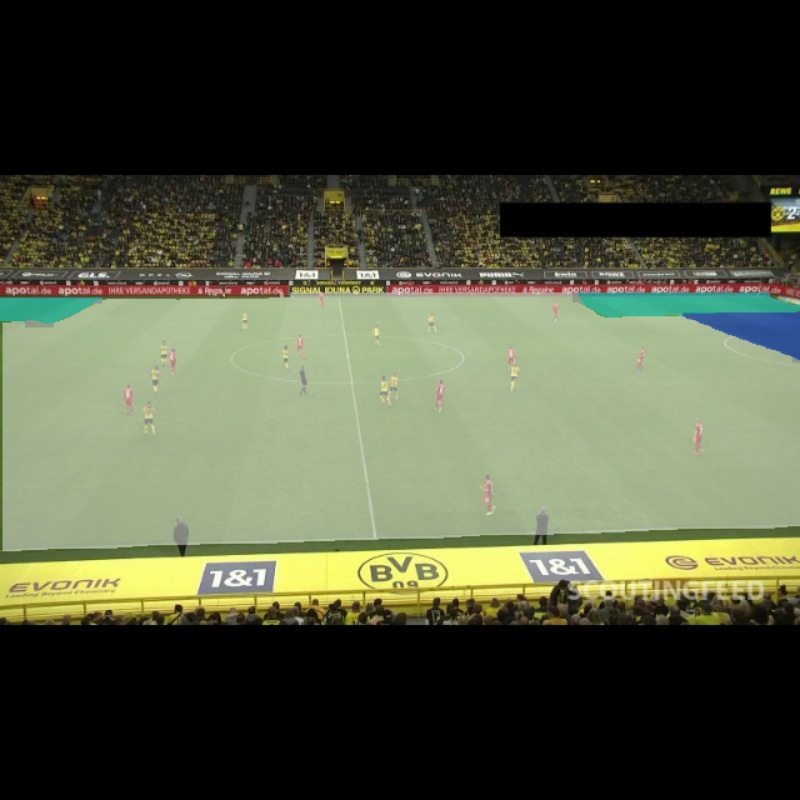

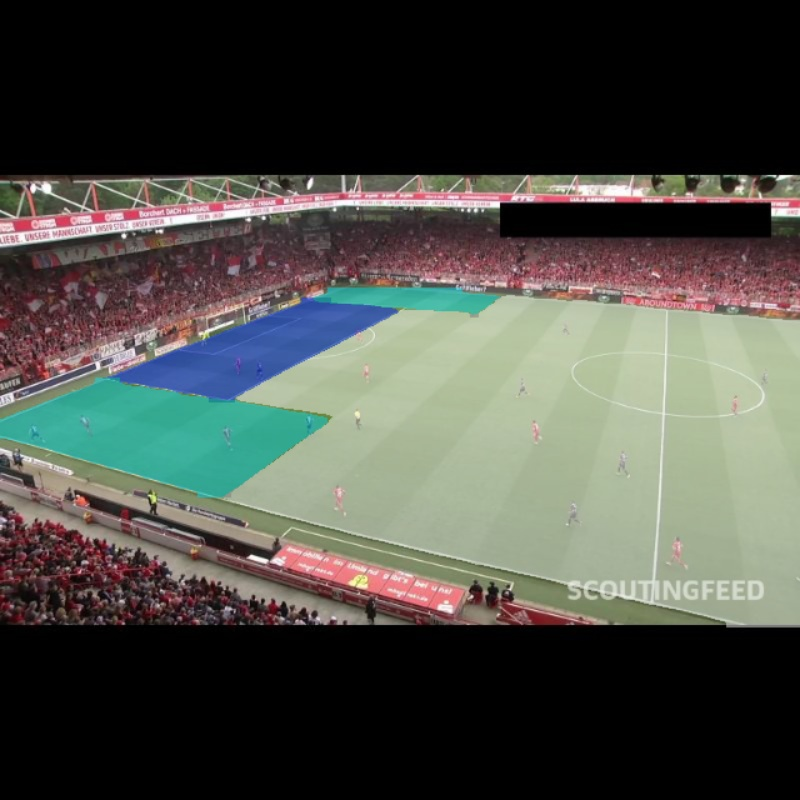

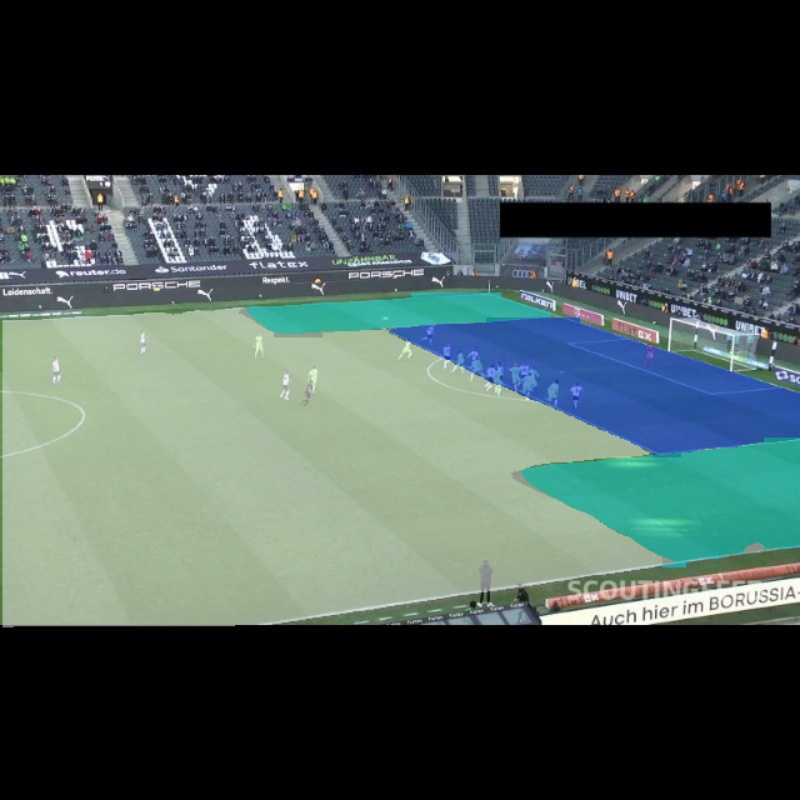

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
    display(Image(filename=image_path, height=600))
    print("\n")